In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]=[10,5]

In [ ]:
df=pd.read_csv("titanic_dataset.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


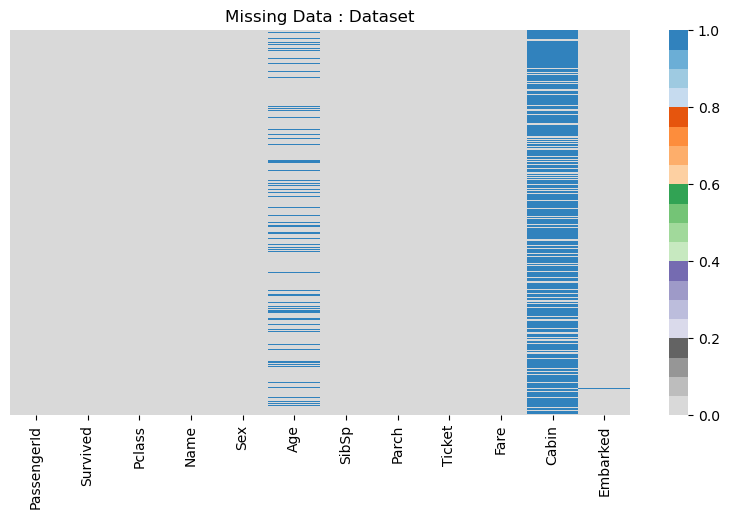

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="tab20c_r")
plt.title("Missing Data : Dataset")
plt.show()

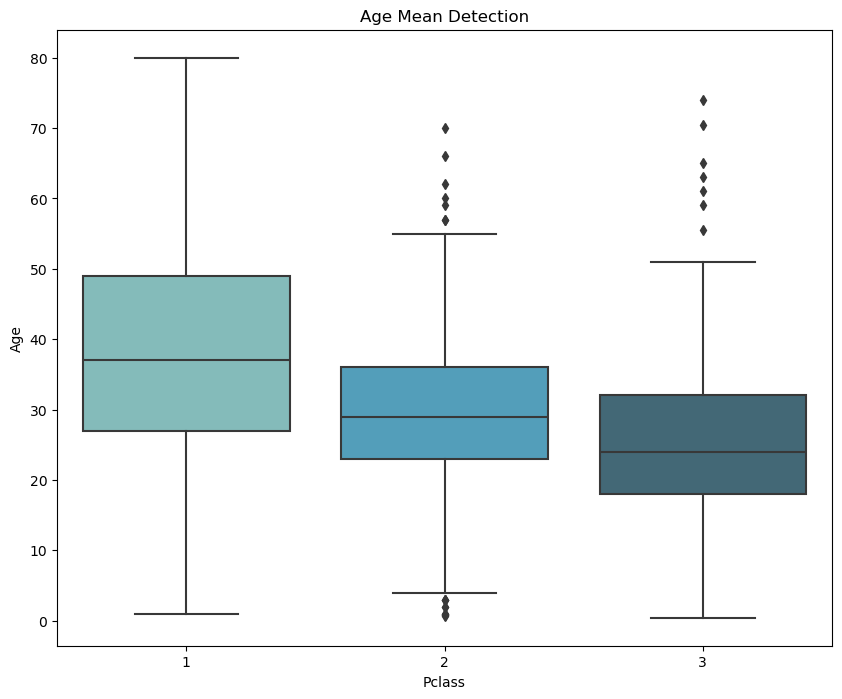

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass",y="Age",data=df,palette="GnBu_d")
plt.title("Age Mean Detection")
plt.show()

In [ ]:
def impute_age(cols):

    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37

        elif Pclass==2:
            return 29

        else:
            return 25

    else:
        return Age

df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)


In [ ]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(889, 11)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.drop(["Name","Ticket"],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
objcat=["Sex","Embarked"]
for colname in objcat:
    df[colname]=df[colname].astype("category")


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.172295,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.156423,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.drop("PassengerId",axis=1,inplace=True)

In [ ]:
df.shape

(889, 8)

In [ ]:
df.select_dtypes(["category"]).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
embarked=pd.get_dummies(df["Embarked"],drop_first=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df=pd.concat([df,sex,embarked],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [ ]:
df.drop(["Sex","Embarked"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
print("Training Data Shape: ",df.shape)
df.head()

Training Data Shape:  (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
x=df.drop(["Survived"],axis=1)
y=df[["Survived"]]


In [ ]:
from sklearn import preprocessing
pre_process_x = preprocessing.MinMaxScaler().fit(x)
x_transform = pre_process_x.fit_transform(x)

In [ ]:
pre_process_y = preprocessing.MinMaxScaler().fit(y)
y_transform = pre_process_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_transform,y_transform,test_size=.20,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

l_reg = LogisticRegression()
l_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
l_pred = l_reg.predict(x_test)
print(l_pred)

[0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.metrics import accuracy_score
print("Logistic Regression")
print("-----------------------------------")
score_l=round(accuracy_score(y_test,l_pred)* 100,2)
print("Acccuracy Score: ",score_l,"%")

Logistic Regression
-----------------------------------
Acccuracy Score:  80.9 %


Precision: 0.82
Recall: 0.66
--------------------------------------
[[97 10]
 [24 47]]


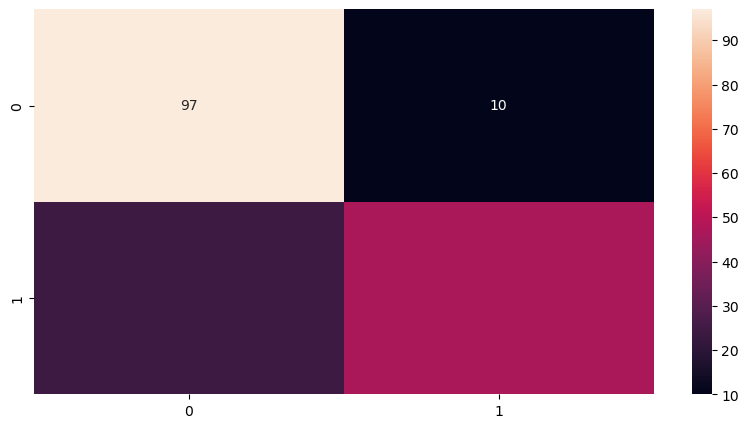

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

precision_l = precision_score(y_test,l_pred)
recall_l = recall_score(y_test,l_pred)

print(f"Precision: {precision_l:.2f}")
print(f"Recall: {recall_l:.2f}")
print("--------------------------------------")

con_l = confusion_matrix(y_test,l_pred)
print(con_l)
sns.heatmap(con_l, annot=True, fmt="d")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT_pred = DT.predict(x_test)
print(DT_pred)

[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.]


In [ ]:
score_DT = round(accuracy_score(DT_pred,y_test)* 100,2)
print("Decision Tree Classification")
print("----------------------------------------")
print("Accuracy Score: ",score_DT,"%")

Decision Tree Classification
----------------------------------------
Accuracy Score:  77.53 %


Precision: 0.70
Recall: 0.77
--------------------------------------
[[83 24]
 [16 55]]


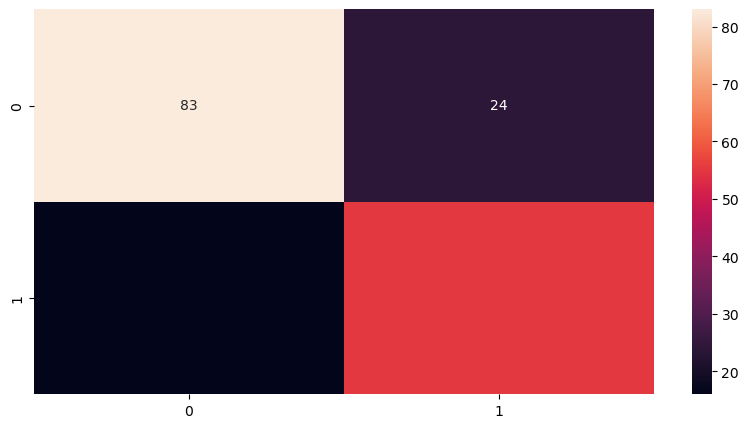

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

precision_DT = precision_score(y_test,DT_pred)
recall_DT = recall_score(y_test,DT_pred)

print(f"Precision: {precision_DT:.2f}")
print(f"Recall: {recall_DT:.2f}")
print("--------------------------------------")

con_DT = confusion_matrix(y_test,DT_pred)
print(con_DT)
sns.heatmap(con_DT,annot=True,fmt="d")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RF_pred = RF.predict(x_test)
print(RF_pred)

[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
score_RF = round(accuracy_score(RF_pred,y_test)* 100,2)

print("Random Forest Classification")
print("----------------------------------------")
print("Accuracy Score: ",score_RF,"%")

Random Forest Classification
----------------------------------------
Accuracy Score:  82.58 %


Precision: 0.80
Recall: 0.75
--------------------------------------
[[94 13]
 [18 53]]


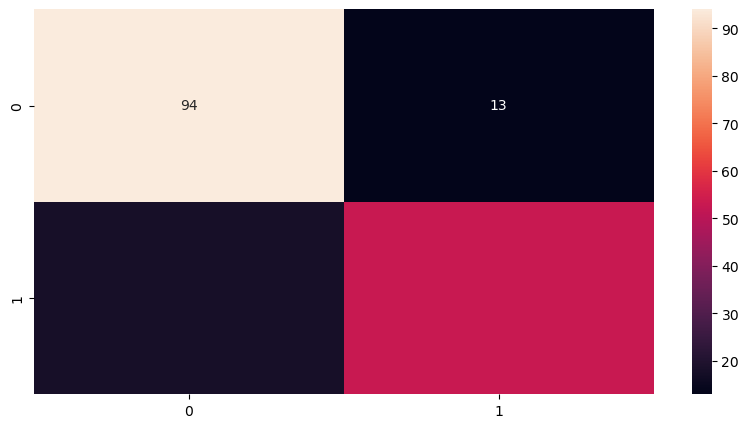

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

precision_RF = precision_score(y_test,RF_pred)
recall_RF = recall_score(y_test,RF_pred)

print(f"Precision: {precision_RF:.2f}")
print(f"Recall: {recall_RF:.2f}")
print("--------------------------------------")

con_RF = confusion_matrix(y_test,RF_pred)
print(con_RF)
sns.heatmap(con_RF,annot=True,fmt="d")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)


GradientBoostingClassifier()

In [ ]:
GB_pred = GB.predict(x_test)
print(GB_pred)

[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
score_GB = round(accuracy_score(GB_pred,y_test)* 100,2)

print("Gradient Boosting Classifier")
print("-----------------------------------------")
print("Accuracy Score: ",score_GB,"%")


Gradient Boosting Classifier
-----------------------------------------
Accuracy Score:  85.39 %


Precision: 0.86
Recall: 0.76
--------------------------------------
[[98  9]
 [17 54]]


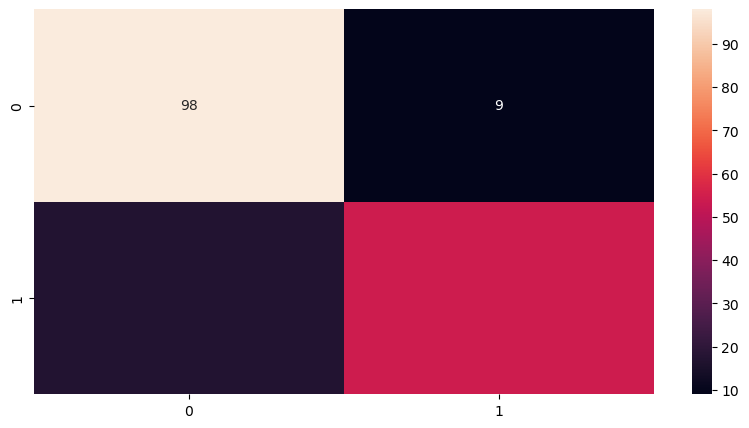

In [ ]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix

precision_GD = precision_score(y_test,GB_pred)
recall_GD = recall_score(y_test,GB_pred)

print(f"Precision: {precision_GD:.2f}")
print(f"Recall: {recall_GD:.2f}")
print("--------------------------------------")

con_GB = confusion_matrix(y_test,GB_pred)
print(con_GB)
sns.heatmap(con_GB,annot=True,fmt="d")
plt.show()

In [ ]:
model_scores = {
    "Logistic Regression":80.9,
    "Decision Tree":78.65,
    "Random Forest":82.02,
    "Gradient Boosting":85.39}

sorted_scores = sorted(model_scores.items(),key=lambda x:x[1],reverse=True)
print("Clasification Accuracy(Higher Value Accurate Model)")
print("---------------------------------------------------")

for ranks,(name,scores) in enumerate(sorted_scores,start=1):
    print(f"\n{ranks}. {name} : {scores}")

Clasification Accuracy(Higher Value Accurate Model)
---------------------------------------------------

1. Gradient Boosting : 85.39

2. Random Forest : 82.02

3. Logistic Regression : 80.9

4. Decision Tree : 78.65


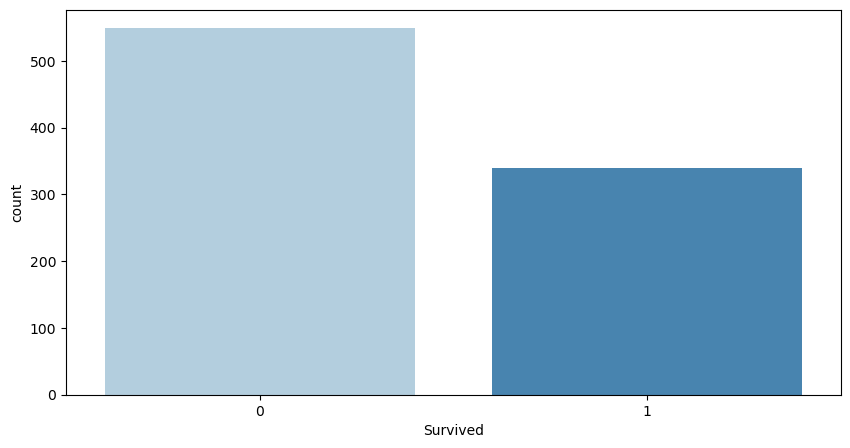

In [ ]:
sns.countplot(x="Survived",data=df,palette="Blues")
plt.show()